# Lets Grow More - Data Science Internship

## Beginner Level Task
# Task-3: Iris Flowers Dataset Classification ML Project

## Step 1: Reading and Understanding the Data
Let's start with the following steps:

#### 1. Importing data using the pandas library
#### 2. Understanding the structure of the data


In [1]:
# Import necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

### Attribute Information from Dataset:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
          -- Iris Setosa
          -- Iris Versicolour
          -- Iris Virginica

In [3]:
iris_data = pd.read_csv("iris.data",header=None)
iris_data.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
print(iris_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
iris_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Let's inspect the various aspects of our dataframe

In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [9]:
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Step 2: Visualising the Data

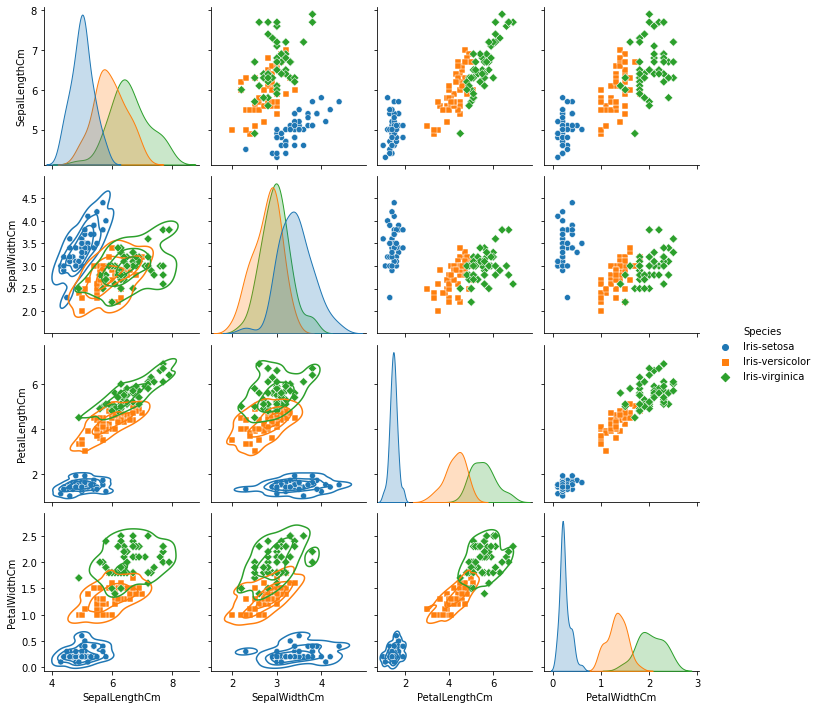

In [10]:
iris_df = iris_data.drop('Species',axis=1)
g = sns.pairplot(iris_data,hue='Species',kind='scatter',markers=["o", "s", "D"])
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

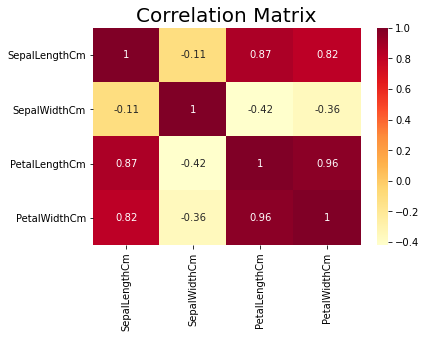

In [12]:
sns.heatmap(iris_data.corr(), cmap="YlOrRd", annot = True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

## Different Features of Iris-Setosa Species

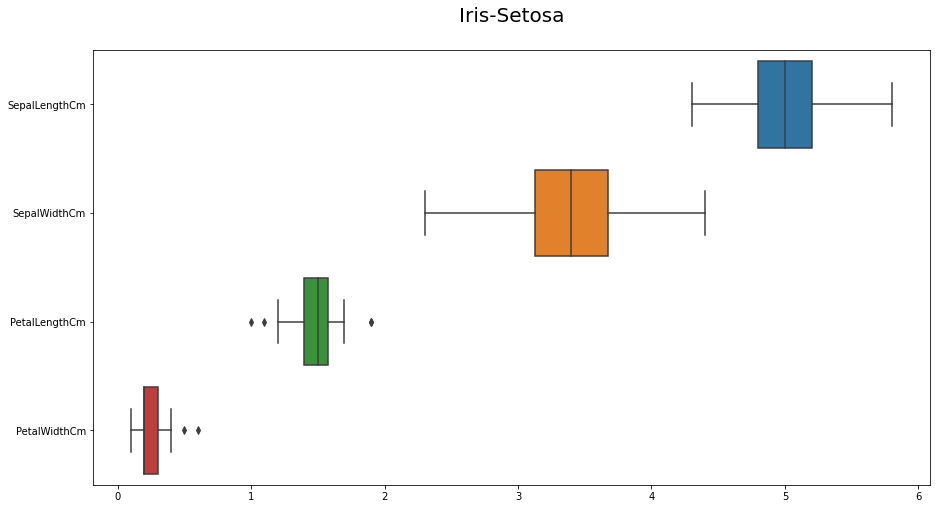

In [16]:
plt.figure(figsize=(15,8))
setosa = iris_data[iris_data['Species'] == "Iris-setosa"]
bp = sns.boxplot(data = setosa, orient="h")
bp.set_title("Iris-Setosa\n", fontsize = 20)
plt.show()

## Different Features of Iris-Versicolor Species

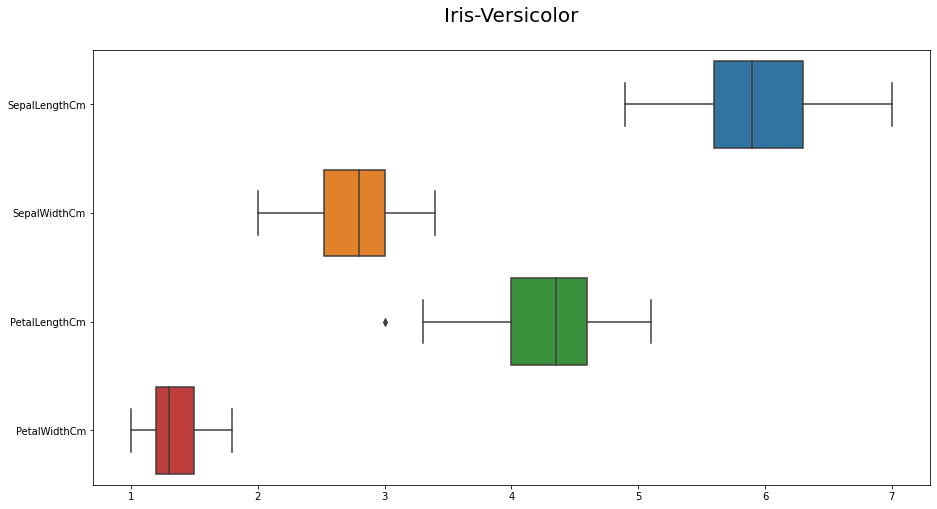

In [17]:
plt.figure(figsize=(15, 8))
versicolor = iris_data[iris_data['Species'] == "Iris-versicolor"]
bp = sns.boxplot(data = versicolor, orient="h")
bp.set_title("Iris-Versicolor\n", fontsize = 20)
plt.show()

## Different Features of Iris-Virginica Species

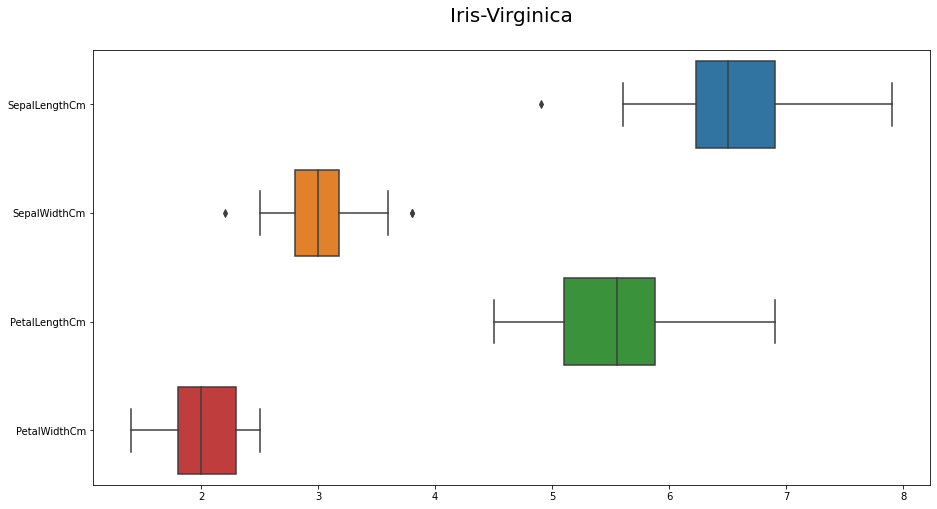

In [19]:
plt.figure(figsize=(15, 8))
virginica = iris_data[iris_data['Species'] == "Iris-virginica"]
bp = sns.boxplot(data = virginica, orient="h")
bp.set_title("Iris-Virginica\n", fontsize = 20)
plt.show()

## Relation between Sepal-Length and Sepal-Width of Species.

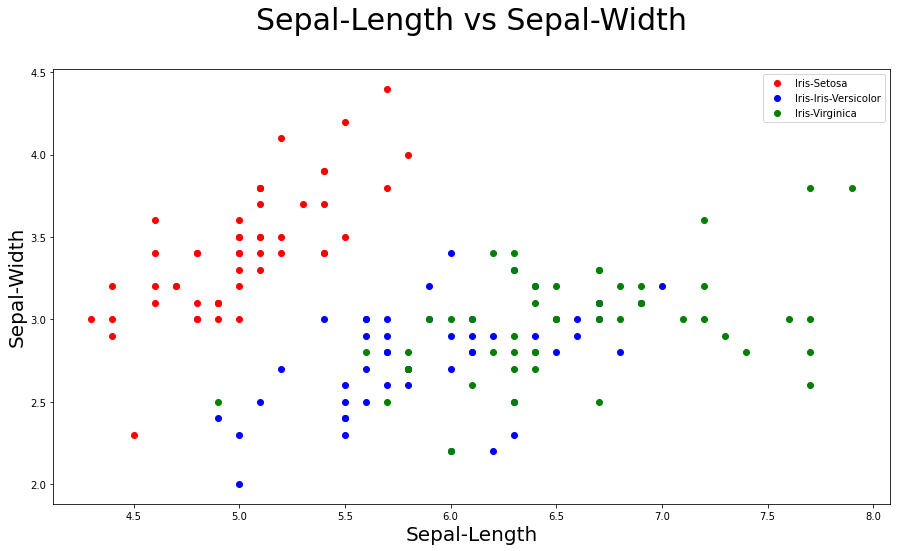

In [21]:
plt.figure(figsize=(15, 8))
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c="red", label="Iris-Setosa")
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="blue", label="Iris-Iris-Versicolor")
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="green", label="Iris-Virginica")
plt.xlabel("Sepal-Length", fontsize=20)
plt.ylabel("Sepal-Width", fontsize=20)
plt.title("Sepal-Length vs Sepal-Width\n", fontsize=30)
plt.legend()
plt.show()

## Relation between Petal-Length and Petal-Width of Species.

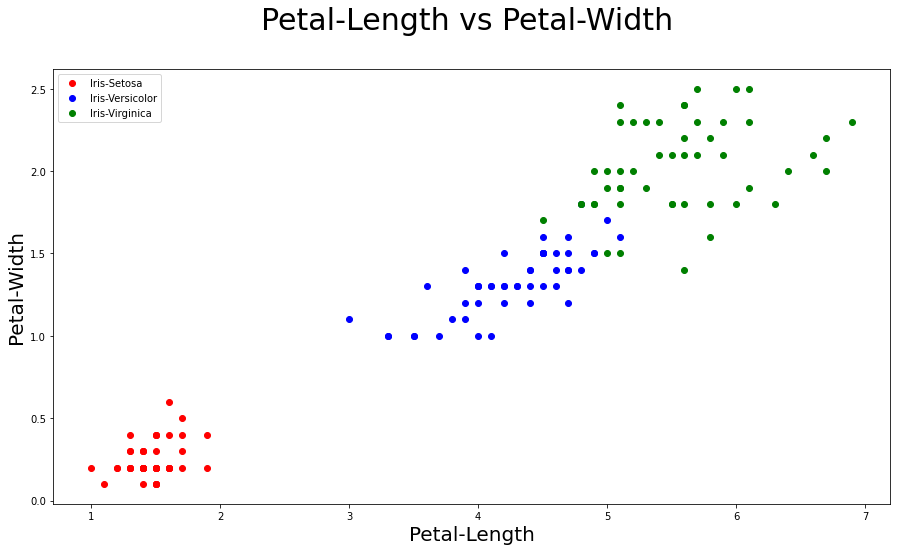

In [22]:
plt.figure(figsize=(15, 8))
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], c="red", label="Iris-Setosa")
plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'], c="blue", label="Iris-Versicolor")
plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'], c="green", label="Iris-Virginica")
plt.xlabel("Petal-Length",fontsize=20)
plt.ylabel("Petal-Width",fontsize=20)
plt.title("Petal-Length vs Petal-Width \n", fontsize=30)
plt.legend()
plt.show()

## Finding the optimum number of clusters for K-means Classification


In [24]:
wcss=[]
x = iris_data.iloc[:,[0,1,2,3]].values
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10,random_state=50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

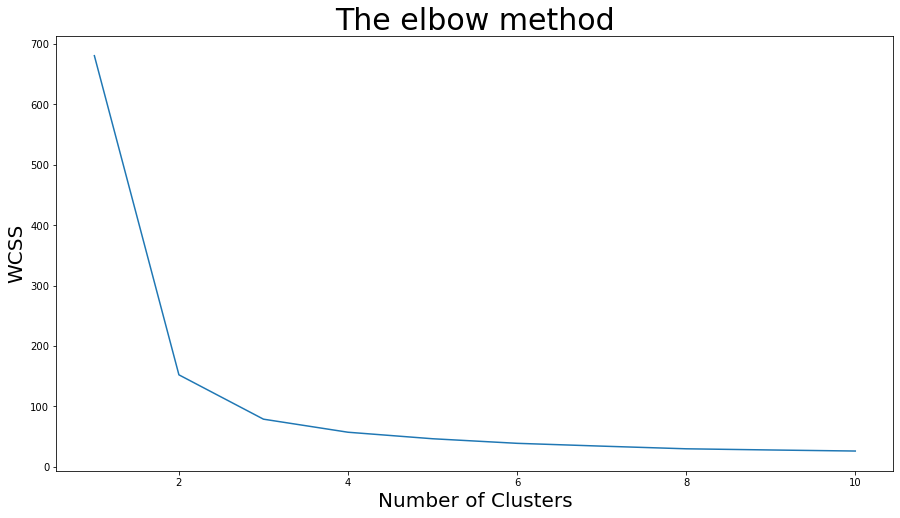

In [26]:
plt.figure(figsize=(15, 8))
plt.plot(range(1,11),wcss)
plt.title('The elbow method',fontsize=30)
plt.xlabel('Number of Clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10,random_state=50)
y_kmeans = kmeans.fit_predict(x)

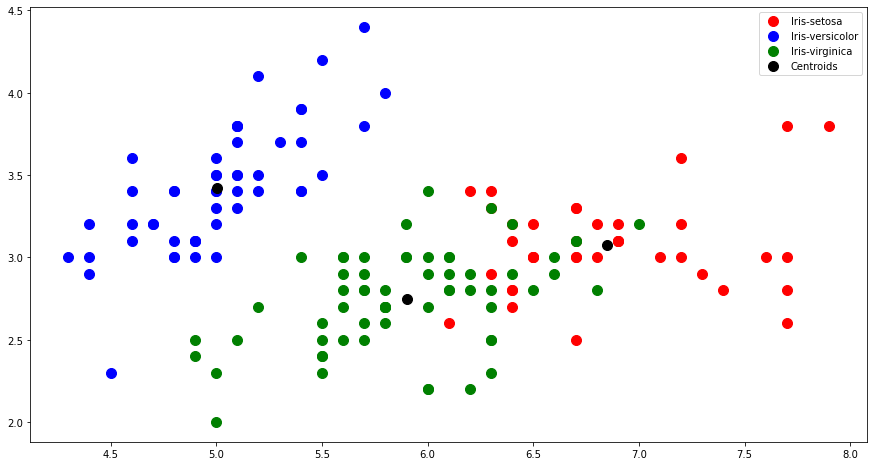

In [28]:
plt.figure(figsize=(15, 8))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.legend()
plt.show()

## Done by: Mansi Singh